<a href="https://colab.research.google.com/github/suraj-75/laughing-train/blob/main/Predicting_a_Pulsar_Star_using_SVM_and_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

data = pd.read_csv("./Pulsar.csv")

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [30]:
data.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


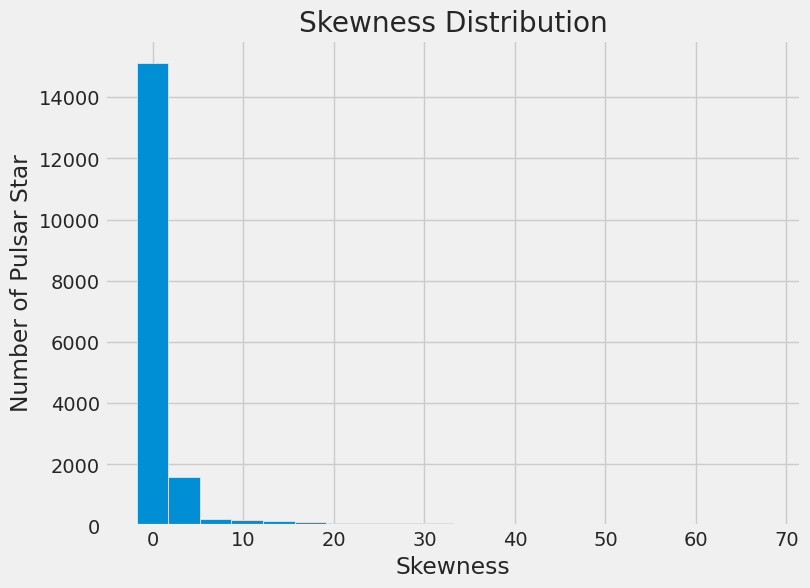

In [31]:
plt.figure(figsize=(8, 6))
data.Skewness.hist(bins=20)
plt.xlabel("Skewness")
plt.ylabel("Number of Pulsar Star")
plt.title("Skewness Distribution")
plt.show()


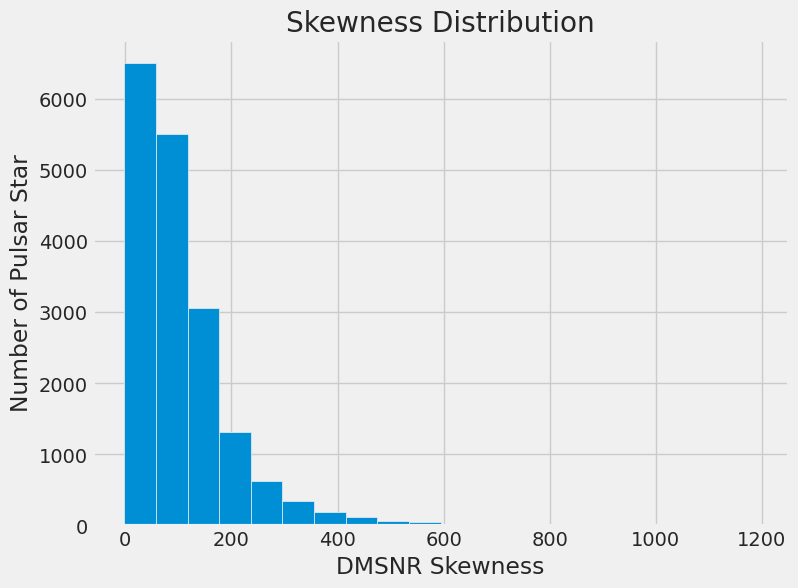

In [32]:
plt.figure(figsize=(8, 6))
data.Skewness_DMSNR_Curve.hist(bins=20)
plt.xlabel("DMSNR Skewness")
plt.ylabel("Number of Pulsar Star")
plt.title("Skewness Distribution")
plt.show()


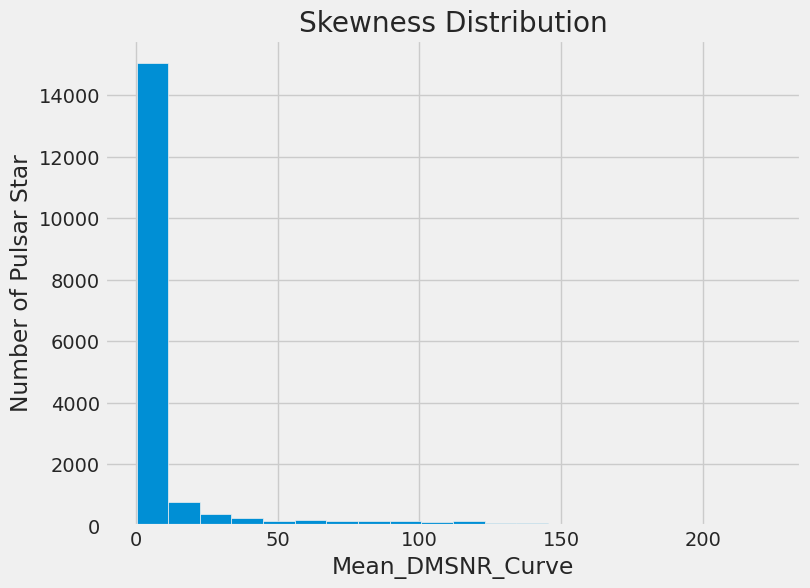

In [33]:
plt.figure(figsize=(8, 6))
data.Mean_DMSNR_Curve.hist(bins=20)
plt.xlabel("Mean_DMSNR_Curve")
plt.ylabel("Number of Pulsar Star")
plt.title("Skewness Distribution")
plt.show()

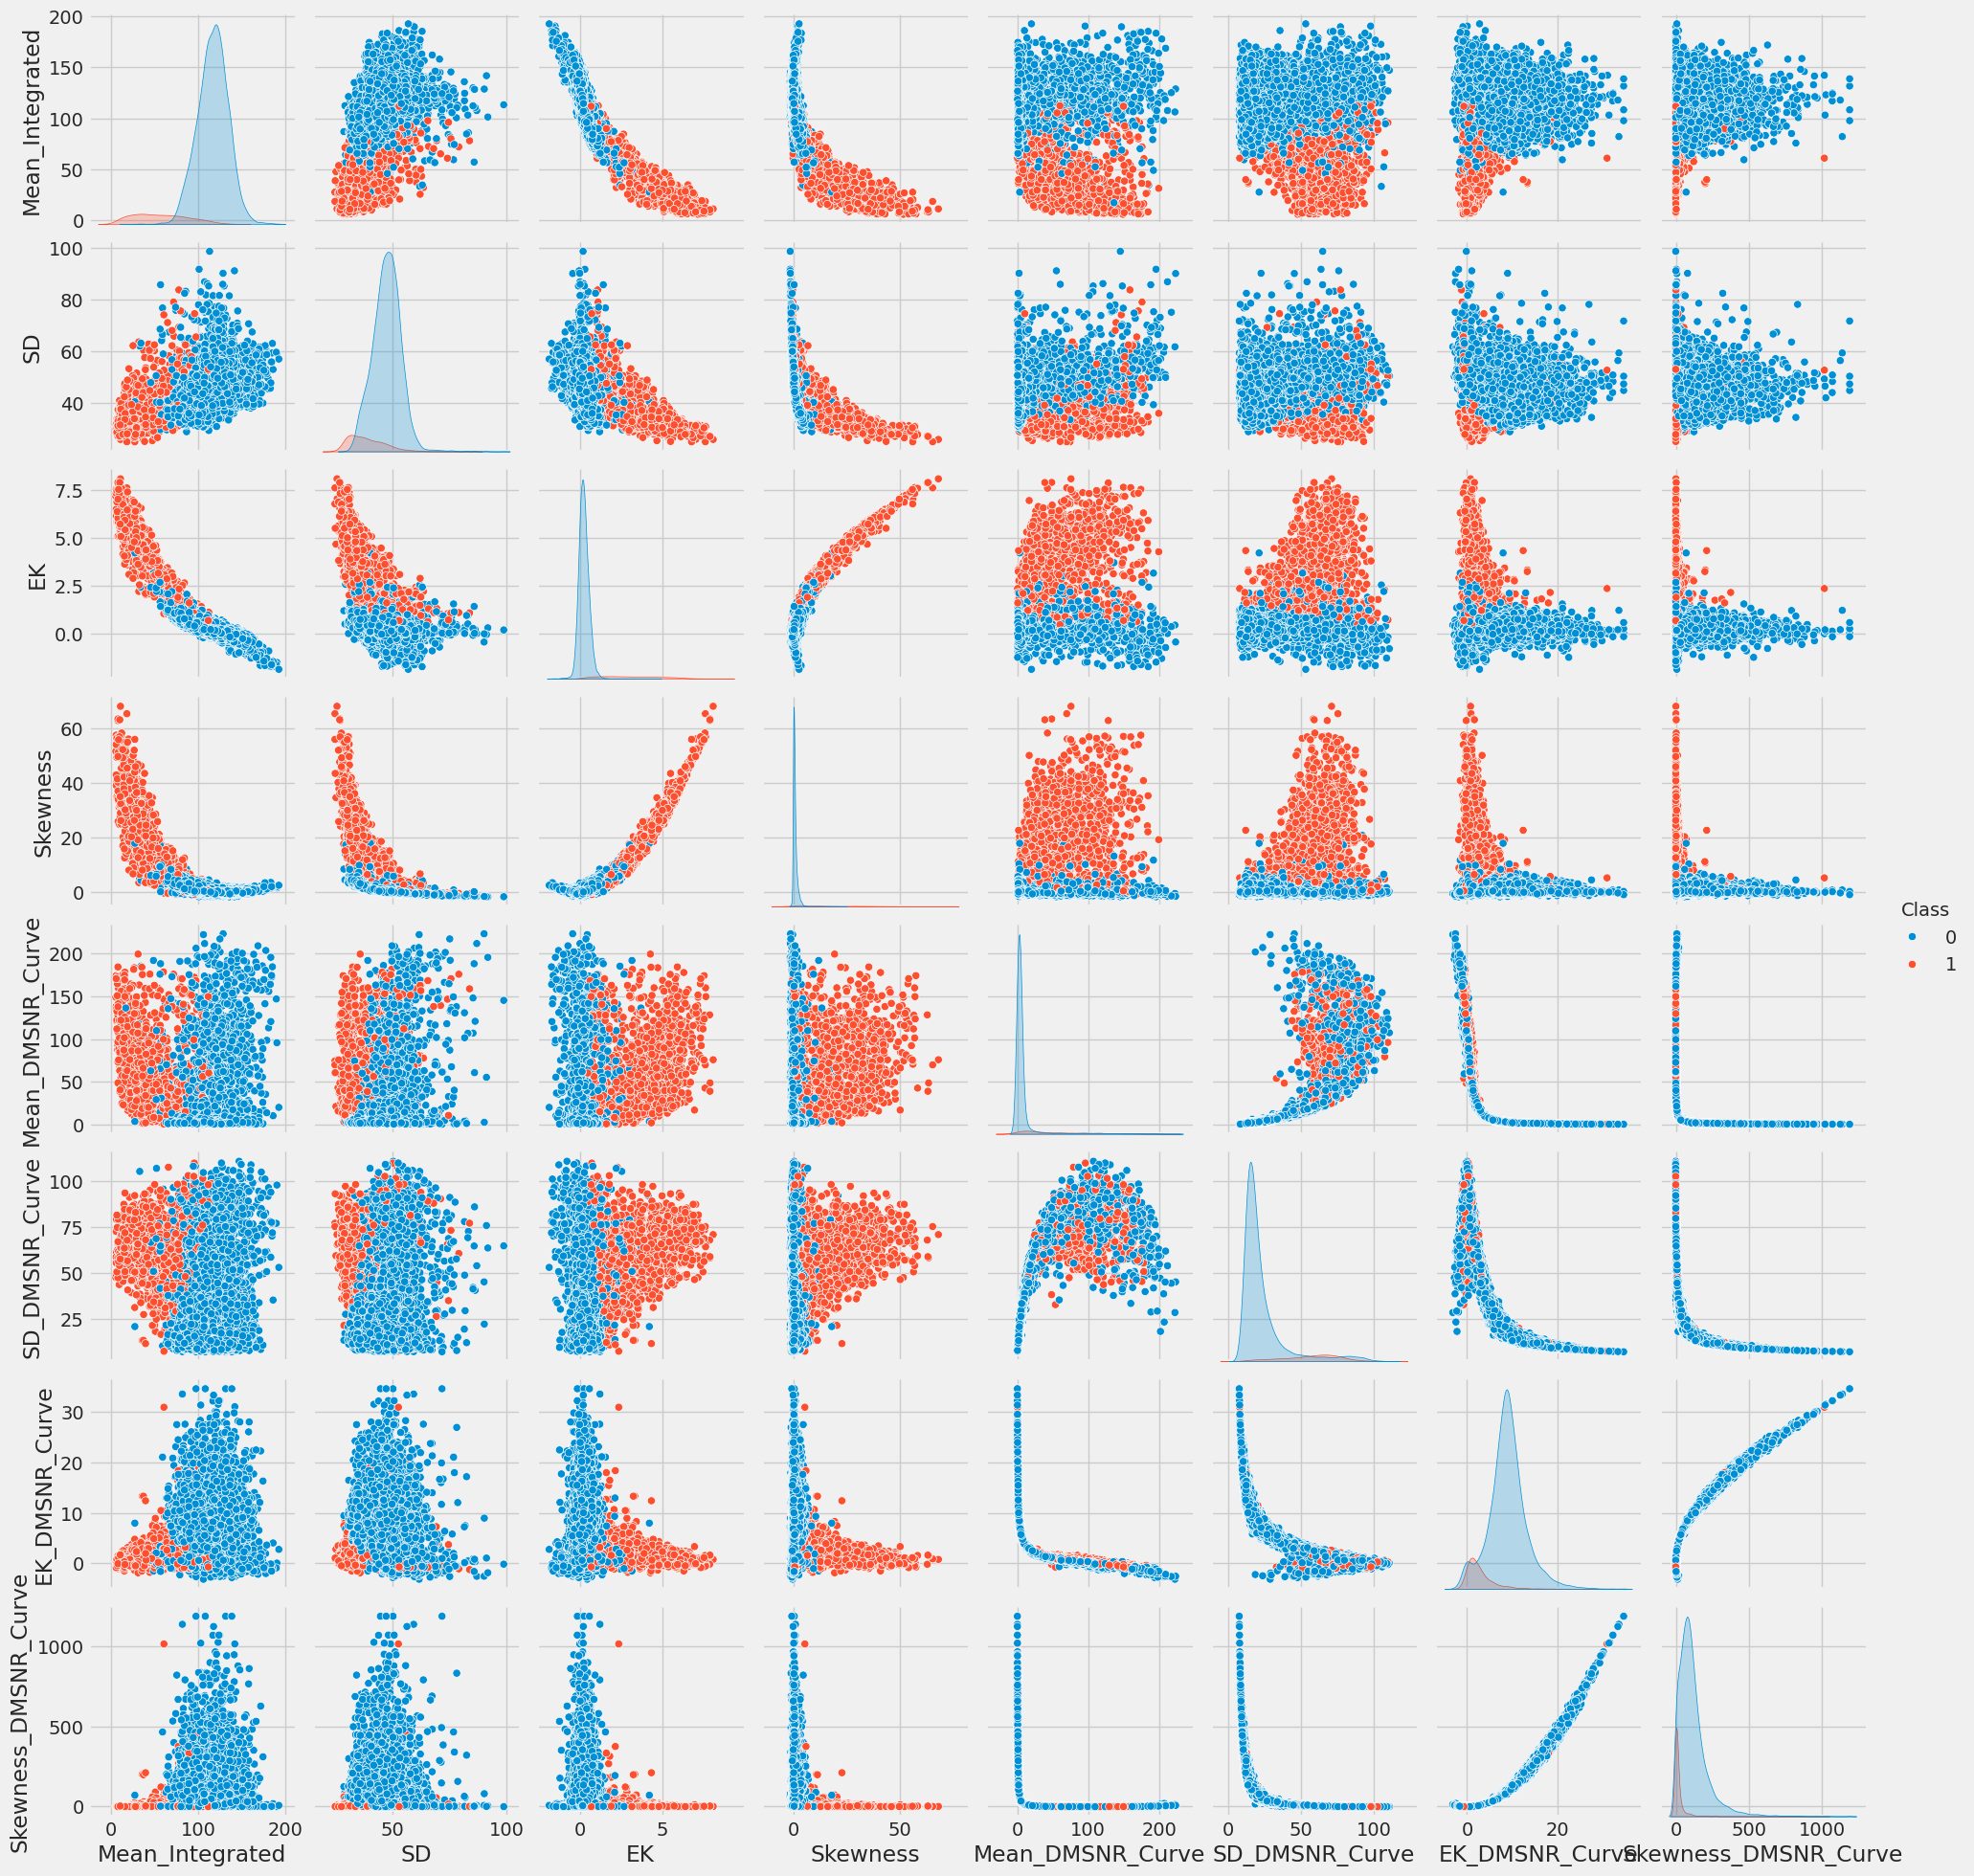

In [7]:
sns.pairplot(data, hue="Class")

In [8]:
data['Class'].value_counts()

,count
Class,
0,16259
1,1639


<Axes: >

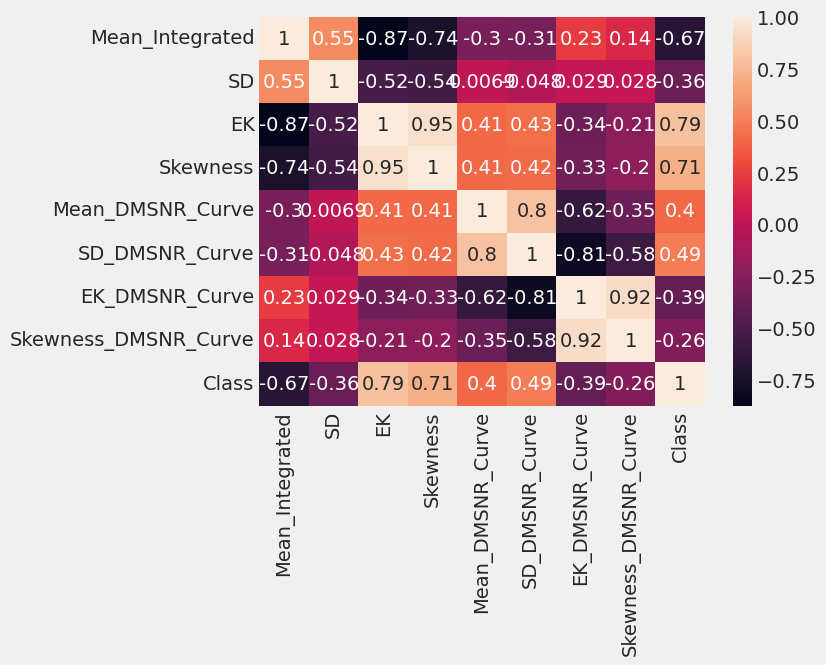

In [9]:
sns.heatmap(data.corr(), annot=True)

In [10]:
data.shape

(17898, 9)

In [11]:
data.columns

Index(['Mean_Integrated', 'SD', 'EK', 'Skewness', 'Mean_DMSNR_Curve',
       'SD_DMSNR_Curve', 'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve', 'Class'],
      dtype='object')

In [12]:
data["Class"].value_counts()/ float(len(data))

,count
Class,
0,0.908426
1,0.091574


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_transformer

x_train = data.drop("Class", axis=1)
y_train = data["Class"]

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

# Apply StandardScaler to all columns
ct = make_column_transformer((StandardScaler(), x_train.columns),(MinMaxScaler(), x_train.columns), remainder="passthrough")


x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((12528, 16), (5370, 16), (12528,), (5370,))

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
  if train:
    pred = clf.predict(x_train)
    clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
    print("Train Result:\n================================")
    print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
    print("_____________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_____________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

  elif train==False:
    Pred = clf.predict(x_test)
    clf_report = pd.DataFrame(classification_report(y_test, Pred, output_dict=True))
    print("Test Result:\n================================")
    print(f"Accuracy Score: {accuracy_score(y_test, Pred) * 100:.2f}%")
    print("_____________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("_____________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y_test, Pred)}\n")
    return Pred

In [16]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
print_score(svc, x_train, y_train, x_test, y_test, train=True)
print_score(svc, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 97.90%
_____________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.982124     0.943227  0.979007      0.962676      0.978544
recall         0.994989     0.821336  0.979007      0.908162      0.979007
f1-score       0.988515     0.878071  0.979007      0.933293      0.978350
support    11375.000000  1153.000000  0.979007  12528.000000  12528.000000
_____________________________________
Confusion Matrix: 
 [[11318    57]
 [  206   947]]

Test Result:
Accuracy Score: 97.90%
_____________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.981433    0.949398  0.978957     0.965415      0.978534
recall        0.995700    0.810700  0.978957     0.903200      0.978957
f1-score      0.988515    0.874584  0.978957     0.931549      0.978204
support    4884.000000  486.000000  0.978957  5370.0

array([0, 1, 0, ..., 0, 0, 0])

Therefore, by using Support Vector Machine we got a Accuracy Score of 97.90% in both Train and Test Result.

In [17]:
#let us use logistics regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
print_score(lr, x_train, y_train, x_test, y_test, train=True)
print_score(lr, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 97.90%
_____________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.982041     0.944112  0.979007      0.963076      0.978550
recall         0.995077     0.820468  0.979007      0.907773      0.979007
f1-score       0.988516     0.877958  0.979007      0.933237      0.978341
support    11375.000000  1153.000000  0.979007  12528.000000  12528.000000
_____________________________________
Confusion Matrix: 
 [[11319    56]
 [  207   946]]

Test Result:
Accuracy Score: 97.84%
_____________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.981422    0.942584  0.978399     0.962003      0.977907
recall        0.995086    0.810700  0.978399     0.902893      0.978399
f1-score      0.988207    0.871681  0.978399     0.929944      0.977661
support    4884.000000  486.000000  0.978399  5370.0

array([0, 1, 0, ..., 0, 0, 0])

**By using Logistics Regression we got a Accuracy Score of 97.90% in Train Result and 97.84% in Test Result.**

RUN SVM WITH RBF KERNEL WITH C = 1000.0

We have seen that their are outliers in our dataset. So we should increase the value of C as higher C means fewer outliers. So i will learn SVM with kernel = rbf and C = 100.0

In [18]:
rfsvc = SVC(C=100.0)
rfsvc.fit(x_train, y_train)
print_score(rfsvc, x_train, y_train, x_test, y_test, train=True)
print_score(rfsvc, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 98.34%
_____________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.985142     0.963690  0.983397      0.974416      0.983168
recall         0.996747     0.851691  0.983397      0.924219      0.983397
f1-score       0.990911     0.904236  0.983397      0.947573      0.982934
support    11375.000000  1153.000000  0.983397  12528.000000  12528.000000
_____________________________________
Confusion Matrix: 
 [[11338    37]
 [  171   982]]

Test Result:
Accuracy Score: 98.06%
_____________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.983806    0.944186  0.980633     0.963996      0.980220
recall        0.995086    0.835391  0.980633     0.915238      0.980633
f1-score      0.989414    0.886463  0.980633     0.937938      0.980096
support    4884.000000  486.000000  0.980633  5370.0

array([0, 1, 0, ..., 0, 0, 0])

Model accuracy score with rbf kernel and C=100.0  :  0.9806
We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers.

Now, I will further increase the value of C=1000.0 and check accuracy.

In [19]:
svc = SVC(C=10000.0)
svc.fit(x_train, y_train)
print_score(svc, x_train, y_train, x_test, y_test, train=True)
print_score(svc, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 98.83%
_____________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.988515     0.986473  0.988346      0.987494      0.988327
recall         0.998769     0.885516  0.988346      0.942143      0.988346
f1-score       0.993616     0.933272  0.988346      0.963444      0.988062
support    11375.000000  1153.000000  0.988346  12528.000000  12528.000000
_____________________________________
Confusion Matrix: 
 [[11361    14]
 [  132  1021]]

Test Result:
Accuracy Score: 97.60%
_____________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.983134    0.897550  0.975978     0.940342      0.975388
recall        0.990581    0.829218  0.975978     0.909900      0.975978
f1-score      0.986843    0.862032  0.975978     0.924438      0.975548
support    4884.000000  486.000000  0.975978  5370.0

array([0, 1, 0, ..., 0, 0, 0])

In this case, we can see that the Accuracy Score had decreased with C = 1000.0

RUN SVM WITH LINEAR KERNEL WITH C = 1.0

In [20]:
svc = SVC(kernel="linear", C=1.0)
svc.fit(x_train, y_train)
print_score(svc, x_train, y_train, x_test, y_test, train=True)
print_score(svc, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 97.94%
_____________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.982216     0.947053  0.979406      0.964634      0.978980
recall         0.995341     0.822203  0.979406      0.908772      0.979406
f1-score       0.988735     0.880223  0.979406      0.934479      0.978748
support    11375.000000  1153.000000  0.979406  12528.000000  12528.000000
_____________________________________
Confusion Matrix: 
 [[11322    53]
 [  205   948]]

Test Result:
Accuracy Score: 97.88%
_____________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.981041    0.951456  0.978771     0.966249      0.978363
recall        0.995905    0.806584  0.978771     0.901245      0.978771
f1-score      0.988417    0.873051  0.978771     0.930734      0.977976
support    4884.000000  486.000000  0.978771  5370.0

array([0, 1, 0, ..., 0, 0, 0])

RUN SVM WITH LINEAR KERNEL WITH C = 100.0

In [21]:
svc = SVC(kernel="linear", C=1000.0)
svc.fit(x_train, y_train)
print_score(svc, x_train, y_train, x_test, y_test, train=True)
print_score(svc, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 97.98%
_____________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.982642     0.947316  0.979805      0.964979      0.979391
recall         0.995341     0.826539  0.979805      0.910940      0.979805
f1-score       0.988951     0.882816  0.979805      0.935883      0.979183
support    11375.000000  1153.000000  0.979805  12528.000000  12528.000000
_____________________________________
Confusion Matrix: 
 [[11322    53]
 [  200   953]]

Test Result:
Accuracy Score: 97.88%
_____________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.981235    0.949275  0.978771     0.965255      0.978342
recall        0.995700    0.808642  0.978771     0.902171      0.978771
f1-score      0.988415    0.873333  0.978771     0.930874      0.977999
support    4884.000000  486.000000  0.978771  5370.0

array([0, 1, 0, ..., 0, 0, 0])

We can see that we can obtain higher accuracy with C=1000.0 as compared to C=1.0.

Here, y_test are the true class labels and Pred are the predicted class labels in the test-set.

Check for Overfitting and Underfitting

In [22]:
print('Training set score: {:.4f}'.format(svc.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(x_test, y_test)))

Training set score: 0.9798
Test set score: 0.9788


In [23]:
y_test.value_counts()

,count
Class,
0,4884
1,486


The training-set accuracy score is 0.9798 while the test-set accuracy to be 0.9798. These two values are quite comparable. So, there is no question of overfitting.

COMPARE MODEL ACCURACY WITH NULL ACCURACY

So, the model accuracy is 0.9806 by RBF Kernel at C = 100. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

In [24]:
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)

Null accuracy: Class
0    0.909497
Name: count, dtype: float64


We can see that our model accuracy score is 0.9806 but null accuracy score is 0.9094. So, we can conclude that our SVM classifier is doing a very good job in predicting the class labels.

Test Result:
Accuracy Score: 97.88%
_____________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.981235    0.949275  0.978771     0.965255      0.978342
recall        0.995700    0.808642  0.978771     0.902171      0.978771
f1-score      0.988415    0.873333  0.978771     0.930874      0.977999
support    4884.000000  486.000000  0.978771  5370.000000   5370.000000
_____________________________________
Confusion Matrix: 
 [[4863   21]
 [  93  393]]



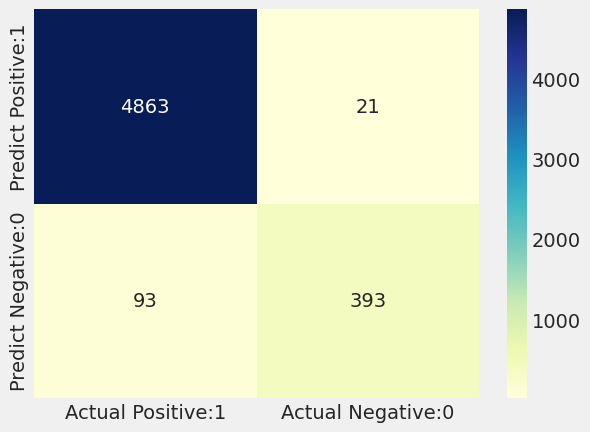


True Positives(TP) =  4863

True Negatives(TN) =  393

False Positives(FP) =  21

False Negatives(FN) =  93


In [25]:
#Visualization of Confusion matrix with Seaborn heatmap
Pred = print_score(svc, x_train, y_train, x_test, y_test, train=False)
cm_matrix = confusion_matrix(y_test, Pred)
cm_matrix = pd.DataFrame(data=cm_matrix, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


print('\nTrue Positives(TP) = ', cm_matrix.loc['Predict Positive:1', 'Actual Positive:1'])

print('\nTrue Negatives(TN) = ', cm_matrix.loc['Predict Negative:0', 'Actual Negative:0'])

print('\nFalse Positives(FP) = ', cm_matrix.loc['Predict Positive:1', 'Actual Negative:0'])

print('\nFalse Negatives(FN) = ', cm_matrix.loc['Predict Negative:0', 'Actual Positive:1'])

Calculate Classification Accuracy, Classification Error, Precision, Recall(True Positive Rate, False Positive Rate, Specificity f1 score,

In [26]:
TP = cm_matrix.loc['Predict Positive:1', 'Actual Positive:1']
TN = cm_matrix.loc['Predict Negative:0', 'Actual Negative:0']
FP = cm_matrix.loc['Predict Positive:1', 'Actual Negative:0']
FN = cm_matrix.loc['Predict Negative:0', 'Actual Positive:1']

classification_accuracy = (TP + TN) / (TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / (TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

precision = TP / (TP + FP)

print('Precision : {0:0.4f}'.format(precision))

recall = TP / (TP + FN)

print(f'Recall : {recall:0.4f}')

false_positive_rate = FP / (FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

f1_score = 2 * precision * recall / (precision + recall)

print('F1 Score : {0:0.4f}'.format(f1_score))

Classification accuracy : 0.9788
Classification error : 0.0212
Precision : 0.9957
Recall : 0.9812
False Positive Rate : 0.0507
Specificity : 0.9493
F1 Score : 0.9884


In [27]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, Pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))


ROC AUC : 0.9022


ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in classifying the pulsar star.

**Results and conclusion**

1. **There are outliers in our dataset. So, as I increase the value of C to limit fewer outliers, the accuracy increased. This is true with different kinds of kernels**.

2. **We get maximum accuracy with rbf kernel with C=100.0 and the accuracy is 0.9806. So, we can conclude that our model is doing a very good job in terms of predicting the class labels. But, this is not true. Here, we have an imbalanced dataset. Accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem. So, we must explore confusion matrix that provide better guidance in selecting models**.

3. **ROC AUC of our model is very close to 1. So, we can conclude that our classifier does a good job in classifying the pulsar star**.